### 教師あり学習の例
上の例では、2次元に落としこんだ時に、はっきりとしたクラスターが形成され、異なる文字の間の境界が自ずと明らかになった。しかし、いつもこんなにうまくクラスター化できるとは限らない。

学習の過程で、それぞれの画像がどの数字をあらわしているかをコンピュータに教えてやれば、その情報をもとに、異なる文字の境界線をコンピュータが自動的に定める。このような方法を教師あり学習と呼ぶ。

#### ランダムフォレスト法による文字分類
それぞれの文字の画像と読み方をセットで教え、機械学習アルゴリズムが分類方法を自動的に考える。

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

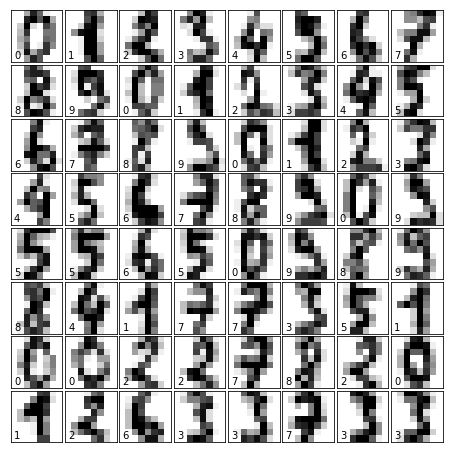

In [7]:
# taken from Python Data Science handbook

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

# 画像データの表示
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
fig.subplots_adjust(left=0,right=1, bottom=0,top=1,hspace=0.05,wspace=0.05)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.text(0,7,str(digits.target[i]))
    axi.set(xticks=[], yticks=[])
    
# 学習用データとテストデータの分割
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)


それを使って、未知データの推定を行う。

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.98      0.98        45
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.98      0.99        49
          8       0.98      0.98      0.98        48
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



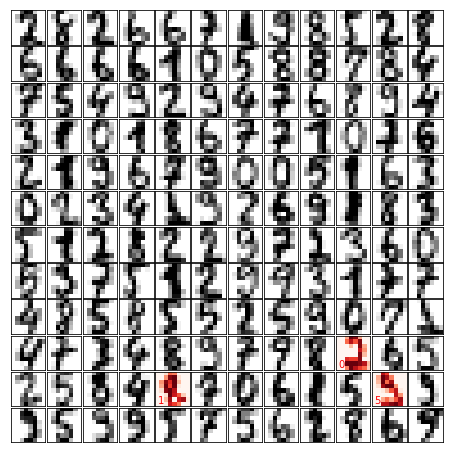

In [28]:
ypred = model.predict(Xtest)

# print(digits.images)
# print(Xtest)
# 画像データの表示
fig, ax = plt.subplots(12, 12, figsize=(6, 6))
fig.subplots_adjust(left=0,right=1, bottom=0,top=1,hspace=0.05,wspace=0.05)
for i, axi in enumerate(ax.flat):
    axi.set(xticks=[], yticks=[])

    if ypred[i] != ytest[i]:
        axi.text(0,7,str(ypred[i]), color='red')
        axi.imshow((Xtest[i]).reshape(8,8), cmap='Reds')
    else:
        axi.imshow(Xtest[i].reshape(8,8), cmap='binary')



from sklearn import metrics
print(metrics.classification_report(ypred, ytest))